In [1]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/MyDrive/datafest')
%cd /content/drive/MyDrive/datafest

Mounted at /content/drive
/content/drive/MyDrive/datafest


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import pandas as pd

total_combined = pd.read_csv("total_combined.csv")
total_combined['idle'] = total_combined['idle_long'] + total_combined['idle_brief']
X = total_combined[['idle','learning_duration_rounded', 'EOC']]
y = total_combined['engagement_score']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a neural network
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    Dense(64, activation='relu'),  # Hidden layer
    Dense(1)  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mse')  # For regression
# model.compile(optimizer='adam', loss='binary_crossentropy', metr

model.evaluate(X_test, y_test)
predictions = model.predict(X_test)



15/15 [==============================] - 0s 1ms/step


In [ ]:
from sklearn.neural_network import MLPRegressor
# Create and train a Multi-Layer Perceptron (MLP) model
mlp_model = MLPRegressor(hidden_layer_sizes=(128, 64), activation='relu', solver='adam', max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)

# Evaluate the model
mlp_predictions = mlp_model.predict(X_test)
mlp_mse = mean_squared_error(y_test, mlp_predictions)
print("MLP Mean Squared Error (MSE):", mlp_mse)


from sklearn.ensemble import RandomForestRegressor

# Create and train a Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
print("Random Forest Mean Squared Error (MSE):", rf_mse)


from sklearn.svm import SVR

# Create and train a Support Vector Regression (SVR) model
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

# Evaluate the model
svr_predictions = svr_model.predict(X_test)
svr_mse = mean_squared_error(y_test, svr_predictions)
print("SVR Mean Squared Error (MSE):", svr_mse)


from sklearn.metrics import r2_score

# Calculate R-squared (R^2) for MLP model
mlp_r_squared = r2_score(y_test, mlp_predictions)
print("MLP R-squared (R^2):", mlp_r_squared)

# Calculate R-squared (R^2) for SVR model
svr_r_squared = r2_score(y_test, svr_predictions)
print("SVR R-squared (R^2):", svr_r_squared)

# Calculate R-squared (R^2) for Random Forest model
rf_r_squared = r2_score(y_test, rf_predictions)
print("Random Forest R-squared (R^2):", rf_r_squared)

MLP Mean Squared Error (MSE): 2473.468724872791
Random Forest Mean Squared Error (MSE): 3235.6094434749775
SVR Mean Squared Error (MSE): 3034.5456305547327
MLP R-squared (R^2): 0.1680248764443244
SVR R-squared (R^2): -0.020698766282541747
Random Forest R-squared (R^2): -0.08832852400486724


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Create and train a Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

# Evaluate the model
gb_predictions = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_r_squared = r2_score(y_test, gb_predictions)

print("Gradient Boosting Mean Squared Error (MSE):", gb_mse)
print("Gradient Boosting R-squared (R^2):", gb_r_squared)

Gradient Boosting Mean Squared Error (MSE): 2508.584304209582
Gradient Boosting R-squared (R^2): 0.15621341177381043


In [ ]:
!pip install lightgbm
import lightgbm as lgb

# Create dataset for LightGBM
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

# Set hyperparameters for LightGBM
params = {
    'objective': 'regression',  # Regression task
    'metric': 'mse',            # Mean Squared Error
    'num_leaves': 31,           # Number of leaves in each tree
    'learning_rate': 0.1,       # Learning rate
    'feature_fraction': 0.9,    # Fraction of features to use
    'bagging_fraction': 0.8,    # Fraction of data to use in each iteration
    'bagging_freq': 5,          # Frequency for bagging
    'verbose': 0                # No output messages
}

# Train the model
num_round = 100
lgb_model = lgb.train(params, train_data, num_round, valid_sets=[test_data],)

# Make predictions
lgb_predictions = lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration)

# Evaluate the model
lgb_mse = mean_squared_error(y_test, lgb_predictions)
lgb_r_squared = r2_score(y_test, lgb_predictions)

print("LightGBM Mean Squared Error (MSE):", lgb_mse)
print("LightGBM R-squared (R^2):", lgb_r_squared)

LightGBM Mean Squared Error (MSE): 2738.8403626727686
LightGBM R-squared (R^2): 0.078764559979978


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error (MSE):", mse)

# Calculate R-squared (R^2)
r_squared = r2_score(y_test, predictions)
print("R-squared (R^2):", r_squared)

Mean Absolute Error (MAE): 22.741168655022186
Mean Squared Error (MSE): 3384.7548899509234
R-squared (R^2): -0.1384950371334992


In [ ]:
import numpy as np

# Set the number of bootstrap samples
num_bootstrap_samples = 1000
cols = ['idle_brief', 'idle_long', 'off_page_brief',
        'learning_duration_rounded', 'EOC', 'n_correct', 'n_attempt', 'engagement_score']
total_combined = total_combined[cols]
# Perform bootstrap sampling
bootstrap_samples = []
for _ in range(num_bootstrap_samples):
    bootstrap_sample = total_combined.sample(n=len(total_combined), replace=True)
    bootstrap_samples.append(bootstrap_sample)


In [ ]:
correlation_matrices = []

# Iterate through each bootstrap sample
for sample in bootstrap_samples:
    # Calculate the correlation matrix for the current sample
    correlation_matrix = sample.corr()
    # Append the correlation matrix to the list
    correlation_matrices.append(correlation_matrix)

# Aggregate the correlation matrices by computing the mean or median
mean_correlation_matrix = pd.concat(correlation_matrices).groupby(level=0).mean()

# Display the mean correlation matrix
print("Mean Correlation Matrix:")
mean_correlation_matrix

Mean Correlation Matrix:


,idle_brief,idle_long,off_page_brief,learning_duration_rounded,EOC,n_correct,n_attempt,engagement_score
EOC,0.076711,0.051295,0.162890,-0.106171,1.000000,0.553956,-0.118226,0.129313
engagement_score,0.335838,0.099312,0.363953,0.047965,0.129313,0.325118,0.217564,1.000000
idle_brief,1.000000,0.265601,0.460829,0.254263,0.076711,0.315976,0.321305,0.335838
idle_long,0.265601,1.000000,0.214921,0.079527,0.051295,0.198259,0.100912,0.099312
learning_duration_rounded,0.254263,0.079527,0.180983,1.000000,-0.106171,-0.015841,0.109856,0.047965
n_attempt,0.321305,0.100912,0.289213,0.109856,-0.118226,0.432011,1.000000,0.217564
n_correct,0.315976,0.198259,0.379915,-0.015841,0.553956,1.000000,0.432011,0.325118
off_page_brief,0.460829,0.214921,1.000000,0.180983,0.162890,0.379915,0.289213,0.363953


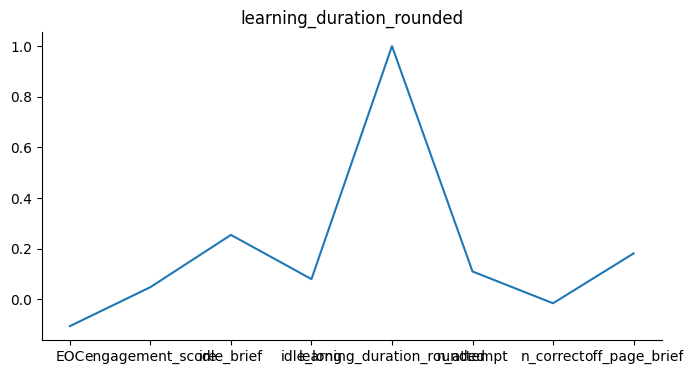

In [ ]:
# @title learning_duration_rounded

from matplotlib import pyplot as plt
mean_correlation_matrix['learning_duration_rounded'].plot(kind='line', figsize=(8, 4), title='learning_duration_rounded')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
total_combined = pd.read_csv("total_combined.csv")

In [4]:
import pandas as pd
total_combined = pd.read_csv("total_combined.csv")

low_eoc_threshold = 0.3  # Example threshold for low EOC score
high_learning_duration_threshold = total_combined['learning_duration_rounded'].quantile(0.75)
high_attempts_threshold = total_combined['n_attempt'].quantile(0.75)

filtered_data = total_combined[(total_combined['EOC'] < low_eoc_threshold) &
                               (total_combined['learning_duration_rounded'] > high_learning_duration_threshold) &
                               (total_combined['n_attempt'] > high_attempts_threshold) &
                               (total_combined['n_attempt'] < 500)]
filtered_data.head()

,student_id,access,engaged,idle_brief,idle_long,off_page_brief,off_page_long,chapter_number,book_x,submit,learning_duration_rounded,class_id,book_y,EOC,n_possible,n_correct,n_attempt,engagement_score
224,16ce31ff-ab83-4080-a785-67b2bf8ae86d,2023-02-15 01:01:12,6095688.0,2426490.0,0.0,0.0,8419373.0,4.0,College / Statistics and Data Science (ABC),2023-02-27 19:04:31,306.0,b1421b49-4026-4c61-9786-d4ef110c8db3,College / Statistics and Data Science (ABC),0.254386,115,29,182,9.361328
241,188d45ee-832d-40a6-bd57-05e97d88e631,2023-02-13 20:58:00,6171925.0,1802182.0,0.0,3127660.0,68538365.0,3.0,College / Statistics and Data Science (ABC),2023-02-25 06:51:03,273.0,98119d92-8cc6-416a-972c-630351726223,College / Statistics and Data Science (ABC),0.165049,103,17,159,18.555931
533,328dce3c-7ee3-4d7e-b2b4-b56844fd284f,2023-05-12 03:31:27,16651085.0,1042584.0,0.0,1838031.0,0.0,12.0,College / Advanced Statistics and Data Science...,2023-05-23 08:28:29,268.0,25d5269a-ea76-4cb4-844d-3dbcf0bffc53,College / Advanced Statistics and Data Science...,0.240506,158,38,194,50.334825
750,4c647bf3-034a-4392-bd99-ce89315a4ec5,2023-02-17 01:34:46,5084625.0,974131.0,2474810.0,953343.0,78814572.0,4.0,College / Statistics and Data Science (ABC),2023-05-18 22:28:45,2180.0,103f5ce8-9e95-4916-815e-9f821d274a59,College / Statistics and Data Science (ABC),0.285714,70,20,235,-4.165149
1045,736605fe-b7c4-4cba-8261-0b319f63fac0,2023-02-08 15:24:29,7982658.0,124522.0,0.0,8806418.0,16431447.0,3.0,College / Advanced Statistics and Data Science...,2023-05-08 14:10:23,2134.0,173bd102-4560-470f-b4f1-9841e55f7f37,College / Advanced Statistics and Data Science...,0.241071,112,27,304,15.797971


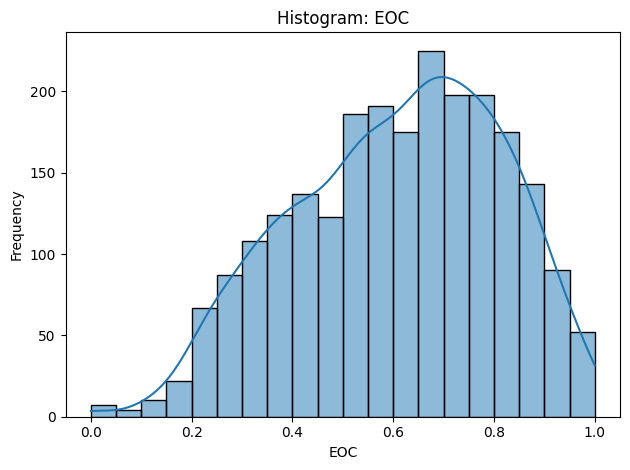

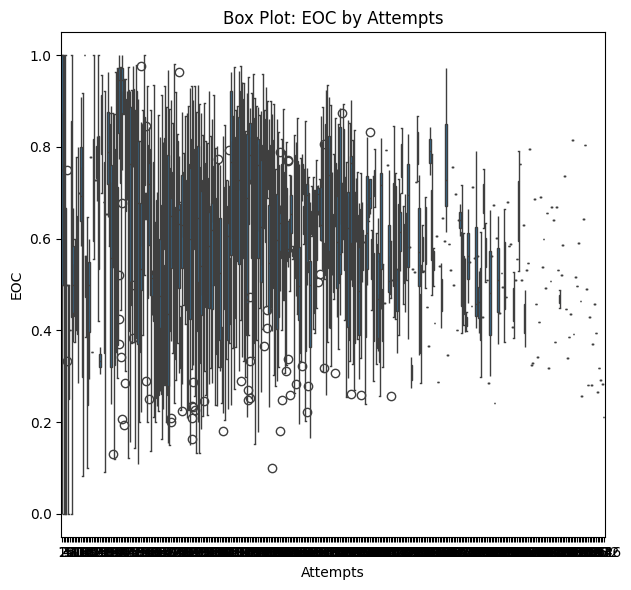

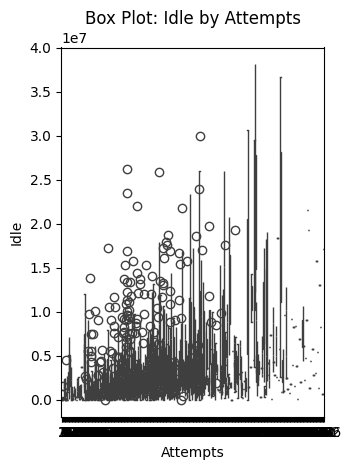

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt



sns.histplot(data=total_combined, x='EOC', bins=20, kde=True)
plt.title('Histogram: EOC')
plt.xlabel('EOC')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Box Plot: Other Variables by Attempts
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)

sns.boxplot(x='n_attempt', y='EOC', data=total_combined)
plt.title('Box Plot: EOC by Attempts')
plt.xlabel('Attempts')
plt.ylabel('EOC')
plt.tight_layout()
plt.show()

plt.subplot(1, 2, 2)
sns.boxplot(x='n_attempt', y='idle_brief', data=total_combined)
plt.title('Box Plot: Idle by Attempts')
plt.xlabel('Attempts')
plt.ylabel('Idle')

plt.tight_layout()
plt.show()

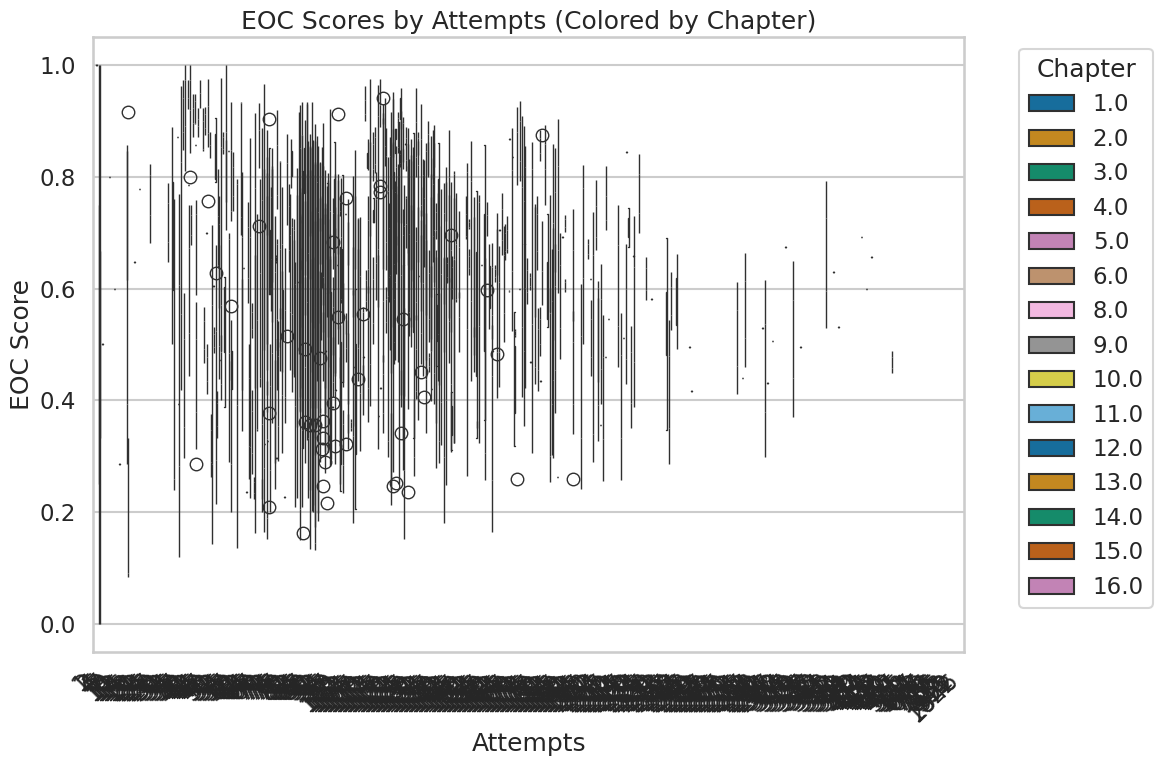

In [13]:
total_combined['chapter_number'] = total_combined['chapter_number'].astype('category')

# Set style and context for better aesthetics
sns.set_style("whitegrid")
sns.set_context("talk")

# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='n_attempt', y='EOC', hue='chapter_number', data=total_combined, palette='colorblind', dodge=True, width=0.6)
plt.title('EOC Scores by Attempts (Colored by Chapter)')
plt.xlabel('Attempts')
plt.ylabel('EOC Score')
plt.legend(title='Chapter', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()
